# **Using google colab so importing libraries to use kaggle api token**

Dataset link
https://www.kaggle.com/competitions/playground-series-s3e20/data


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd

od.download(
  "https://www.kaggle.com/competitions/playground-series-s3e20/code")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bijinsanny
Your Kaggle Key: ··········


100%|██████████| 48.9M/48.9M [00:00<00:00, 64.7MB/s]



Extracting archive ./playground-series-s3e20/playground-series-s3e20.zip to ./playground-series-s3e20


In [ ]:
df=pd.read_csv("/content/playground-series-s3e20/train.csv")
test_df=pd.read_csv("/content/playground-series-s3e20/test.csv")

In [ ]:
df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


# **Preprocessing data**

filling null values with mean and redunant  columns

In [ ]:
len(df)

79023

In [ ]:
df.isnull().sum()

ID_LAT_LON_YEAR_WEEK            0
latitude                        0
longitude                       0
year                            0
week_no                         0
                             ... 
Cloud_sensor_azimuth_angle    484
Cloud_sensor_zenith_angle     484
Cloud_solar_azimuth_angle     484
Cloud_solar_zenith_angle      484
emission                        0
Length: 76, dtype: int64

In [ ]:
df=df.drop(["ID_LAT_LON_YEAR_WEEK"],axis=1)
'''
test_df=test_df.drop(["ID_LAT_LON_YEAR_WEEK"],axis=1)'''

'\ntest_df=test_df.drop(["ID_LAT_LON_YEAR_WEEK"],axis=1)'

In [ ]:
label=df["emission"]


In [ ]:
df.dtypes

latitude                                    float64
longitude                                   float64
year                                          int64
week_no                                       int64
SulphurDioxide_SO2_column_number_density    float64
                                             ...   
Cloud_sensor_azimuth_angle                  float64
Cloud_sensor_zenith_angle                   float64
Cloud_solar_azimuth_angle                   float64
Cloud_solar_zenith_angle                    float64
emission                                    float64
Length: 75, dtype: object

In [ ]:
col=df.columns
col

Index(['latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_colum

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
mean=df.mean()

In [ ]:
mean

latitude                                      -1.891072
longitude                                     29.880155
year                                        2020.000000
week_no                                       26.000000
SulphurDioxide_SO2_column_number_density       0.000048
                                               ...     
Cloud_sensor_azimuth_angle                   -10.784832
Cloud_sensor_zenith_angle                     40.436976
Cloud_solar_azimuth_angle                    -86.800583
Cloud_solar_zenith_angle                      27.925981
emission                                      81.940552
Length: 75, dtype: float64

In [ ]:
df.fillna(mean,inplace=True)

In [ ]:
df.isnull().sum()

latitude                                    0
longitude                                   0
year                                        0
week_no                                     0
SulphurDioxide_SO2_column_number_density    0
                                           ..
Cloud_sensor_azimuth_angle                  0
Cloud_sensor_zenith_angle                   0
Cloud_solar_azimuth_angle                   0
Cloud_solar_zenith_angle                    0
emission                                    0
Length: 75, dtype: int64

In [ ]:

X=df.drop(['latitude', 'longitude', 'year', 'week_no','emission'],axis=1)
n_col=X.columns


In [ ]:
#df=df.dropna()


In [ ]:
X=X.to_numpy()
X=np.float32(X)

In [ ]:
len(X)

79023

In [ ]:
y=df["emission"]

Using normalization to fit the model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)


In [ ]:
type(y)
import numpy as np

y=y.to_numpy()
y=np.float32(y)

In [ ]:
len(X),len(y)

(79023, 79023)

# **Method to split data**
using slicing of dataset instead of train_test_split() method to prevent data leaking into future is important to implement

In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_para,test_para,train_emi,test_emi=make_train_test_splits(X,y, test_split=0.2)

In [ ]:
train_para

array([[0.17118213, 0.21978432, 0.160403  , ..., 0.5183846 , 0.11220598,
        0.6380435 ],
       [0.19602686, 0.29596347, 0.17581093, ..., 0.58073676, 0.06329942,
        0.52600384],
       [0.291193  , 0.30812413, 0.24823704, ..., 0.4352965 , 0.08366764,
        0.49212387],
       ...,
       [0.20130081, 0.3608491 , 0.17999533, ..., 0.67704815, 0.47172332,
        0.49976453],
       [0.15357761, 0.2939128 , 0.14490837, ..., 0.6342434 , 0.42096317,
        0.5358033 ],
       [0.19604267, 0.37716028, 0.17757384, ..., 0.46169925, 0.36164385,
        0.46201107]], dtype=float32)

In [ ]:
len(train_para),len(train_emi)

(63218, 63218)

In [ ]:
len(X)

79023

In [ ]:
y

array([ 3.7509942,  4.0251765,  4.231381 , ..., 29.131205 , 28.125792 ,
       27.239302 ], dtype=float32)

In [ ]:
X.dtype,y.dtype

(dtype('float32'), dtype('float32'))

Parameter testing model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)

model=tf.keras.Sequential([
    layers.Dense(512,activation="relu",input_shape=(70,),kernel_initializer='random_normal'),
    layers.Dense(256,activation="relu",kernel_initializer='random_normal'),
    layers.Dense(1,activation="sigmoid")
])

model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])
model.fit(X,y,epochs=10,verbose=1)

Epoch 1/10
2470/2470 [==============================] - 20s 8ms/step - loss: 81.0934 - mae: 81.0934
Epoch 2/10
2470/2470 [==============================] - 20s 8ms/step - loss: 81.0930 - mae: 81.0930
Epoch 3/10
2470/2470 [==============================] - 19s 8ms/step - loss: 81.0930 - mae: 81.0930
Epoch 4/10
2470/2470 [==============================] - 19s 8ms/step - loss: 81.0930 - mae: 81.0930
Epoch 5/10
2470/2470 [==============================] - 18s 7ms/step - loss: 81.0929 - mae: 81.0929
Epoch 6/10
2470/2470 [==============================] - 18s 7ms/step - loss: 81.0929 - mae: 81.0929
Epoch 7/10
2470/2470 [==============================] - 18s 7ms/step - loss: 81.0929 - mae: 81.0929
Epoch 8/10
2470/2470 [==============================] - 17s 7ms/step - loss: 81.0930 - mae: 81.0930
Epoch 9/10
2470/2470 [==============================] - 17s 7ms/step - loss: 81.0929 - mae: 81.0929
Epoch 10/10
2470/2470 [==============================] - 18s 7ms/step - loss: 81.0930 - mae: 81.0930

In [ ]:
max(df["emission"])

3167.768

In [ ]:
y.dtype

dtype('float32')

Main model model

In [ ]:
input=layers.Input(shape=(70,))
x=layers.Dense(64, activation="relu")(input)

x=layers.Dense(64, activation="relu")(x)
outputs=layers.Dense(1)(x)


model1 = tf.keras.Model(inputs=input, outputs=outputs)
model1.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam())

In [ ]:
model1.fit(train_para,train_emi,epochs=20,validation_data=(test_para,test_emi))

Epoch 1/20
1976/1976 [==============================] - 6s 3ms/step - loss: 25301.7441 - val_loss: 5526.0581
Epoch 2/20
1976/1976 [==============================] - 6s 3ms/step - loss: 24928.6055 - val_loss: 5526.4019
Epoch 3/20
1976/1976 [==============================] - 5s 2ms/step - loss: 24784.8848 - val_loss: 6350.2417
Epoch 4/20
1976/1976 [==============================] - 5s 2ms/step - loss: 24664.5508 - val_loss: 8235.2373
Epoch 5/20
1976/1976 [==============================] - 6s 3ms/step - loss: 24560.4395 - val_loss: 6961.7622
Epoch 6/20
1976/1976 [==============================] - 5s 2ms/step - loss: 24493.2715 - val_loss: 8903.1357
Epoch 7/20
1976/1976 [==============================] - 6s 3ms/step - loss: 24454.3965 - val_loss: 9240.3389
Epoch 8/20
1976/1976 [==============================] - 5s 3ms/step - loss: 24416.0137 - val_loss: 11142.2500
Epoch 9/20
1976/1976 [==============================] - 5s 2ms/step - loss: 24402.9570 - val_loss: 11951.0117
Epoch 10/20
1976/

In [ ]:
y_pred=model.predict(test_para)
y_test=test_emi

494/494 [==============================] - 1s 1ms/step


In [ ]:
len(y_pred),len(y_test)

(15805, 15805)

In [ ]:
import matplotlib.pyplot as plt
def plot_time_series(timesteps, values, format='-', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

In [ ]:
date=list(range(0,len(y_test)))

Plotting graphs to visualize the values

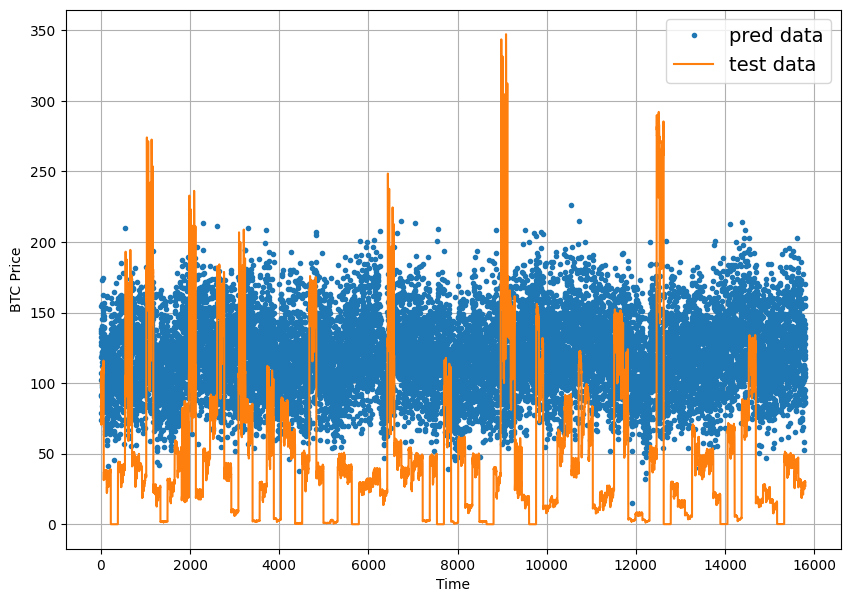

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=date, values=y_pred,label="pred data",format='.')
plot_time_series(timesteps=date, values=y_test,label="test data")


# **Creating a better values with using time series concepts**

Using window and horizon method with the base model to get the solution
adding emission from previous days to predict future emissions
. <br> Therefore using previous 5 emission values to predict current values. <br>
This is an example of an multi-variate time series problem

In [ ]:
df1 = df.copy()
for i in range(5):
  df1[f"emission+{i+1}"] = df1["emission"].shift(periods=i+1)
df1.dropna()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,emission+1,emission+2,emission+3,emission+4,emission+5
5,-0.51,29.29,2019,5,0.000294,0.871713,0.000242,0.227656,-13.453690,57.097124,...,30.128401,37.007020,-137.388719,21.157820,4.310819,4.347317,4.305286,4.231381,4.025176,3.750994
6,-0.51,29.29,2019,6,-0.000285,0.791956,-0.000226,0.119397,72.198647,58.496368,...,4.585368,30.491541,-128.196338,21.721202,4.269334,4.310819,4.347317,4.305286,4.231381,4.025176
7,-0.51,29.29,2019,7,-0.000016,0.976311,-0.000016,0.106799,-100.956055,23.739841,...,16.374829,35.840248,-122.250699,20.432005,4.251361,4.269334,4.310819,4.347317,4.305286,4.231381
8,-0.51,29.29,2019,8,-0.000115,0.796941,-0.000101,0.164971,-40.179074,31.161560,...,-12.021751,42.688789,-114.296369,22.365602,4.281937,4.251361,4.269334,4.310819,4.347317,4.305286
9,-0.51,29.29,2019,9,0.000056,0.998541,0.000014,0.157726,-100.108744,33.592015,...,-66.258392,28.596211,-105.687177,21.084021,4.352933,4.281937,4.251361,4.269334,4.310819,4.347317


In [ ]:
df1=df1.dropna()
df1.isnull().sum()

latitude                                    0
longitude                                   0
year                                        0
week_no                                     0
SulphurDioxide_SO2_column_number_density    0
                                           ..
emission+1                                  0
emission+2                                  0
emission+3                                  0
emission+4                                  0
emission+5                                  0
Length: 80, dtype: int64

In [ ]:


X=df1.drop(['latitude', 'longitude', 'year', 'week_no','emission'],axis=1)
n_col=X.columns

#df=df.dropna()
n_col

Index(['SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_column_number_density',
       'NitrogenDioxide_NO2_slan

In [ ]:

X=X.to_numpy()
X=np.float32(X)

len(X)

y=df1["emission"]

from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaler1.fit(X)
X=scaler1.transform(X)

type(y)


pandas.core.series.Series

In [ ]:
import numpy as np

y=y.to_numpy()
y=np.float32(y)

len(X),len(y)



(79018, 79018)

In [ ]:

train_para,test_para,train_emi,test_emi=make_train_test_splits(X,y, test_split=0.2)


In [ ]:
input=layers.Input(shape=(75,))
x=layers.Dense(64, activation="relu")(input)

x=layers.Dense(64, activation="relu")(x)
outputs=layers.Dense(1)(x)


model = tf.keras.Model(inputs=input, outputs=outputs)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam())

In [ ]:
model.fit(train_para,train_emi,epochs=20,validation_data=(test_para,test_emi))

Epoch 1/20
1976/1976 [==============================] - 6s 3ms/step - loss: 16513.7891 - val_loss: 772.8309
Epoch 2/20
1976/1976 [==============================] - 6s 3ms/step - loss: 2317.3967 - val_loss: 211.3954
Epoch 3/20
1976/1976 [==============================] - 5s 3ms/step - loss: 2127.7664 - val_loss: 172.4002
Epoch 4/20
1976/1976 [==============================] - 5s 2ms/step - loss: 2005.2256 - val_loss: 220.9930
Epoch 5/20
1976/1976 [==============================] - 6s 3ms/step - loss: 1889.8960 - val_loss: 213.5892
Epoch 6/20
1976/1976 [==============================] - 5s 3ms/step - loss: 1801.6296 - val_loss: 160.8914
Epoch 7/20
1976/1976 [==============================] - 6s 3ms/step - loss: 1699.2247 - val_loss: 191.0647
Epoch 8/20
1976/1976 [==============================] - 5s 2ms/step - loss: 1619.7523 - val_loss: 146.7742
Epoch 9/20
1976/1976 [==============================] - 6s 3ms/step - loss: 1538.5093 - val_loss: 164.2558
Epoch 10/20
1976/1976 [=============

In [ ]:
y_pred=model.predict(test_para)
y_test=test_emi

494/494 [==============================] - 1s 2ms/step


In [ ]:
date=list(range(0,len(y_test)))

In [ ]:
len(y_pred),len(y_test)

(15804, 15804)

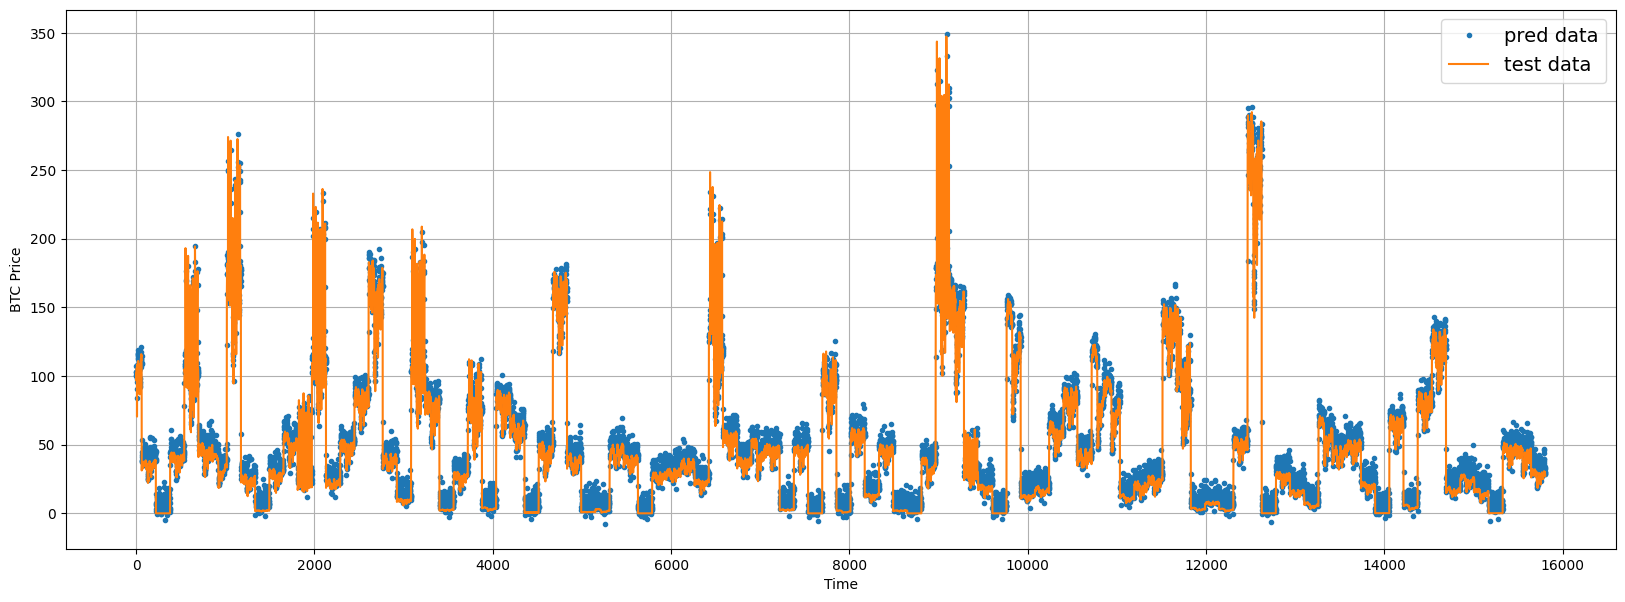

In [ ]:
plt.figure(figsize=(20, 7))
plot_time_series(timesteps=date, values=y_pred,label="pred data",format='.')
plot_time_series(timesteps=date, values=y_test,label="test data")


# **submititng predicted values from base model not the multivariate model**

test submission code

In [ ]:
test_df=pd.read_csv("/content/playground-series-s3e20/test.csv")

In [ ]:
date_column=test_df["ID_LAT_LON_YEAR_WEEK"]

In [ ]:

mean=test_df.drop(['ID_LAT_LON_YEAR_WEEK','latitude', 'longitude', 'year', 'week_no'],axis=1).mean()

mean

test_df.fillna(mean,inplace=True)


In [ ]:
test_df.isnull().sum()

ID_LAT_LON_YEAR_WEEK          0
latitude                      0
longitude                     0
year                          0
week_no                       0
                             ..
Cloud_surface_albedo          0
Cloud_sensor_azimuth_angle    0
Cloud_sensor_zenith_angle     0
Cloud_solar_azimuth_angle     0
Cloud_solar_zenith_angle      0
Length: 75, dtype: int64

In [ ]:
len(test_df)

24353

In [ ]:
X=test_df.drop(['ID_LAT_LON_YEAR_WEEK','latitude', 'longitude', 'year', 'week_no'],axis=1)

In [ ]:
len(X)

24353

In [ ]:

X=X.to_numpy()
X=np.float32(X)
X=scaler.transform(X)

In [ ]:
y=model1.predict(X)

762/762 [==============================] - 2s 2ms/step


In [ ]:
y

array([[ 42.214314],
       [ 38.547745],
       [ 12.579323],
       ...,
       [137.54446 ],
       [141.08768 ],
       [141.2262  ]], dtype=float32)

In [ ]:
pred = pd.DataFrame(y)

In [ ]:
submission = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': date_column, 'emission': pred[0]})

In [ ]:
submission

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,42.214314
1,ID_-0.510_29.290_2022_01,38.547745
2,ID_-0.510_29.290_2022_02,12.579323
3,ID_-0.510_29.290_2022_03,45.961254
4,ID_-0.510_29.290_2022_04,63.068829
...,...,...
24348,ID_-3.299_30.301_2022_44,100.554749
24349,ID_-3.299_30.301_2022_45,132.580215
24350,ID_-3.299_30.301_2022_46,137.544464
24351,ID_-3.299_30.301_2022_47,141.087677


In [ ]:
submission.to_csv('submission.csv', index=False)